In [1]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load dataset
df = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\Data Analysis And Automation\Sample Data\data_jobs.csv")
df.head()

# cleaning the dataset
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [2]:
# help(df.explode)
df[['job_title_short', 'job_skills']].head(5)

,job_title_short,job_skills
0,Senior Data Engineer,NaN
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [ ]:
df_exploded = df.explode('job_skills')

<Axes: xlabel='job_skills'>

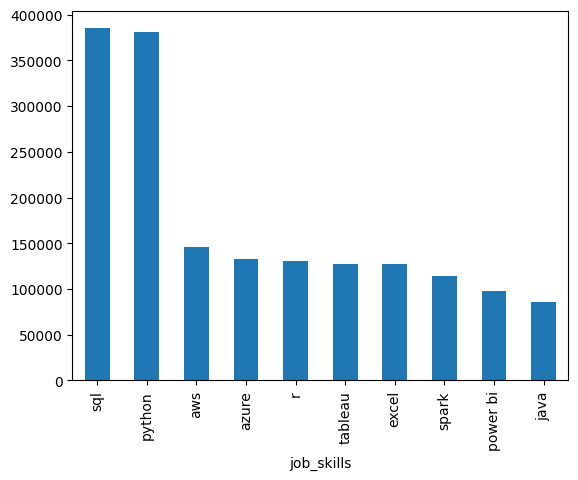

In [ ]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [ ]:
skill_count = df_exploded.groupby(['job_title_short','job_skills']).size()

type(skill_count)

pandas.core.series.Series

In [ ]:
df_skill_count = skill_count.reset_index(name='skill_count')

df_skill_count = df_skill_count.sort_values(by='skill_count', ascending=False)

df_skill_count



,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
462,Data Analyst,chainer,1
432,Cloud Engineer,wrike,1
410,Cloud Engineer,theano,1
24,Business Analyst,chainer,1


<Axes: ylabel='job_skills'>

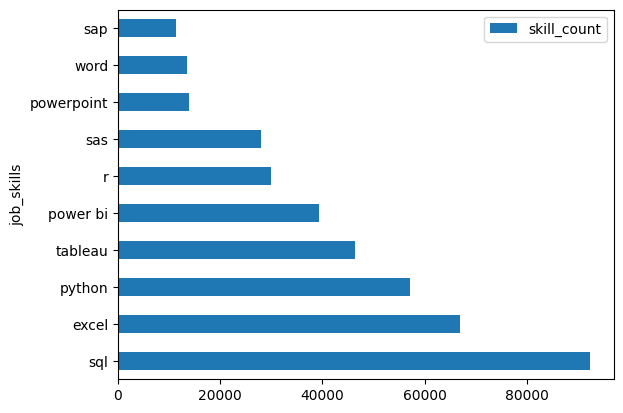

In [ ]:
job_title = 'Data Analyst'
top_skills = 10

df_skill_final = df_skill_count[df_skill_count['job_title_short'] == job_title].head(top_skills)

df_skill_final.plot(kind='barh', x='job_skills', y='skill_count')

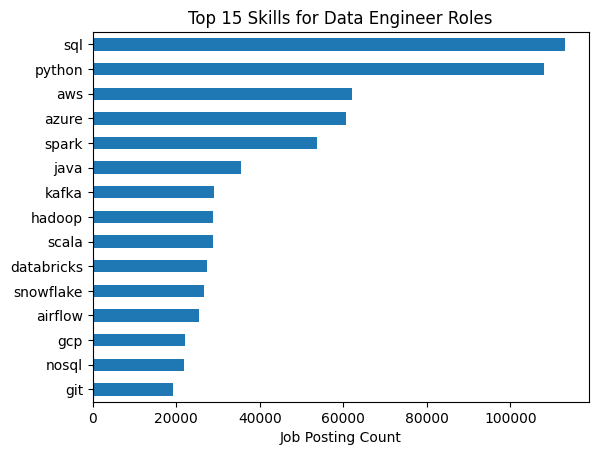

In [ ]:
# invert the y-axis to have the highest value on top
# matplotlib.pyplot.gca().invert_yaxis()
job_title = 'Data Engineer'
top_skills = 15

df_skill_final = df_skill_count[df_skill_count['job_title_short'] == job_title].head(top_skills)

df_skill_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.gca().invert_yaxis()
plt.xlabel('Job Posting Count')
plt.title('Top 15 Skills for Data Engineer Roles')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()